# Links uteis

https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

https://opensource.com/article/19/9/audio-processing-machine-learning-python

http://zderadicka.eu/decoding-audio-captchas-in-python/

https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html#type-i-dct

frequencia de amostragem = 8000
quantidade de amostras = 66688
8.336


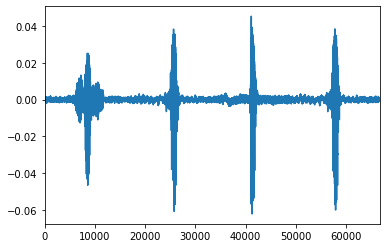

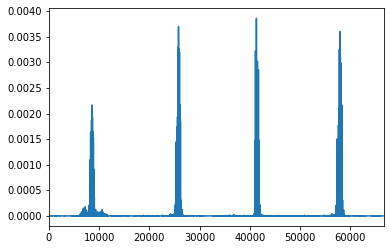

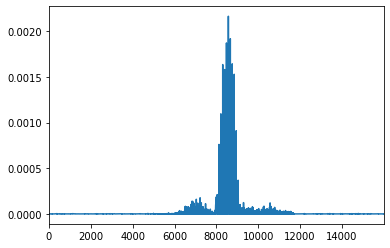

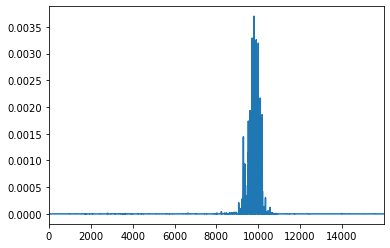

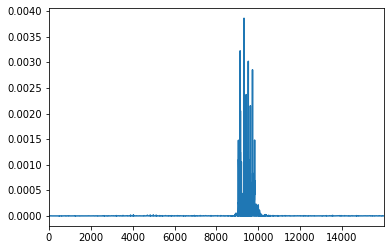

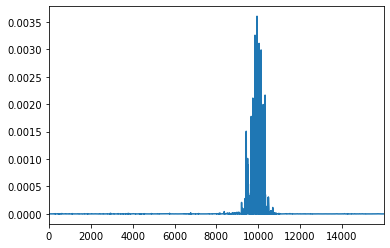

In [10]:
import matplotlib.pylab as plt
import librosa
import pandas as pd
import math
import numpy as np

data, fs = librosa.load("xbbb.wav", sr=8000)
amostras = data.shape[0]
print(f"frequencia de amostragem = {fs}")
#neste caso o audio eh mono e por isso apenas utilizamos a dimensao 0
print(f"quantidade de amostras = {amostras}")

#descobrindo a duracao total do audio em segundos (amostras/amostras/segundos = segundos)
duracao_total = data.shape[0]/fs
print(duracao_total)

intervalo = 2
dados_p_seg = {}
#iterando sobre um vetor que vai de 0 ao tamanho do
for i, ini in enumerate(range(0, data.shape[0], fs*intervalo)):
    #print(f"{ini}:{ini + fs*intervalo}")
    dados_p_seg [i] = pd.Series(data[ini : (ini + fs*intervalo)])

    
df = pd.Series(data[0 : data.shape[0]])
df.plot()
plt.show()

df2 = df.map(lambda a: a**2)
df2.plot()
plt.show()

dados_p_seg[0].map(lambda a: a**2).plot.line()
plt.show()
dados_p_seg[1].map(lambda a: a**2).plot.line()
plt.show()
dados_p_seg[2].map(lambda a: a**2).plot.line()
plt.show()
dados_p_seg[3].map(lambda a: a**2).plot.line()
plt.show()

In [26]:
#2s * 44100 samples/s = 88200 samples for each 2s
#n_fft = 44100 * 0.02 s = 882 samples
#hop_length = 882 // 2 = 441 samples

mfcc_arr = [] 
for i in range(0, 4):
    av = dados_p_seg[i].map(lambda a: a**2).to_numpy(copy=True)
    mfcc_arr.append(librosa.feature.mfcc(y=av, sr=fs, n_mfcc=24))

In [4]:
import matplotlib.pyplot as plt

In [24]:
mfcc_arr = np.array(mfcc_arr)
print(type(mfcc_arr))
print(mfcc_arr.shape)

<class 'numpy.ndarray'>
(4, 24, 32)


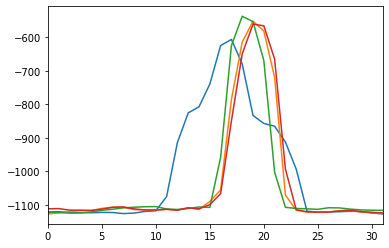

In [28]:
pd.Series(mfcc_arr[0][0]).plot()
pd.Series(mfcc_arr[1][0]).plot()
pd.Series(mfcc_arr[2][0]).plot()
pd.Series(mfcc_arr[3][0]).plot()
plt.show()

In [29]:
from scipy.fftpack import dct
from scipy.fftpack import fft

In [30]:
dct_arr = [] 
for i in range(0, 4):
    av = dados_p_seg[i].map(lambda a: a**2).to_numpy(copy=True)
    dct_arr.append(dct(av, 3))

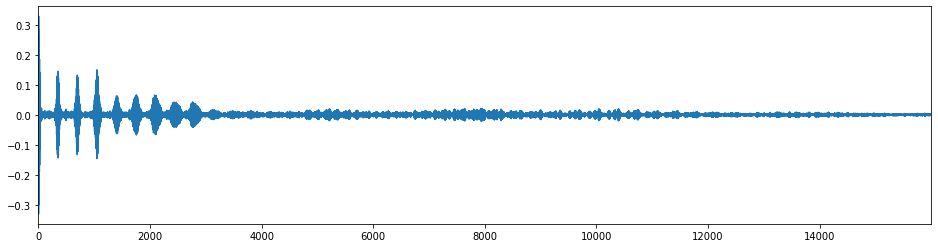

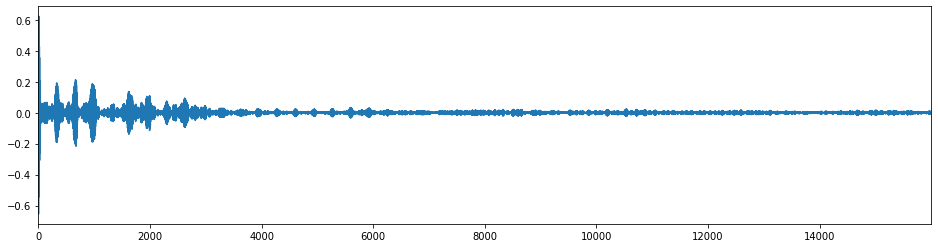

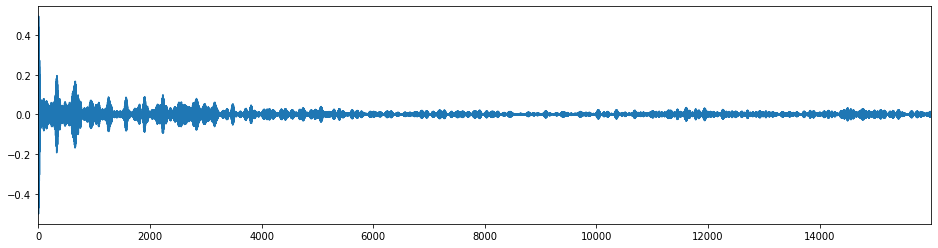

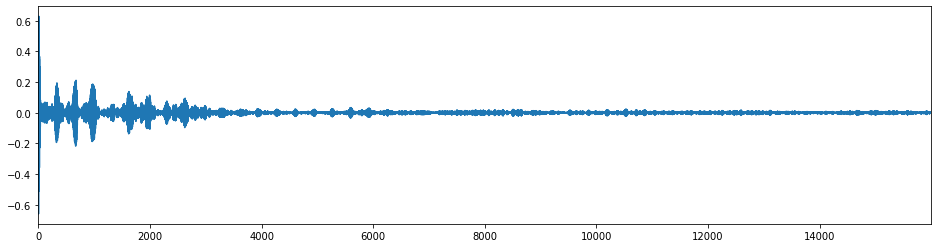

In [31]:
plt.figure(figsize=(16, 4))
pd.Series(dct_arr[0]).plot()
plt.show()
plt.figure(figsize=(16, 4))
pd.Series(dct_arr[1]).plot()
plt.show()
plt.figure(figsize=(16, 4))
pd.Series(dct_arr[2]).plot()
plt.show()
plt.figure(figsize=(16, 4))
pd.Series(dct_arr[3]).plot()
plt.show()

In [32]:
fft_arr = [] 
for i in range(0, 4):
    av = dados_p_seg[i].map(lambda a: a**2).to_numpy(copy=True)
    fft_arr.append(fft(av))

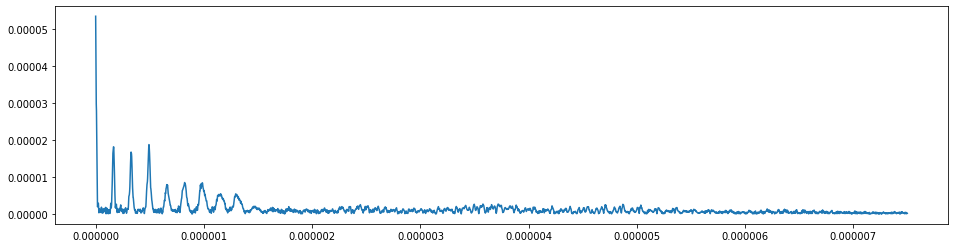

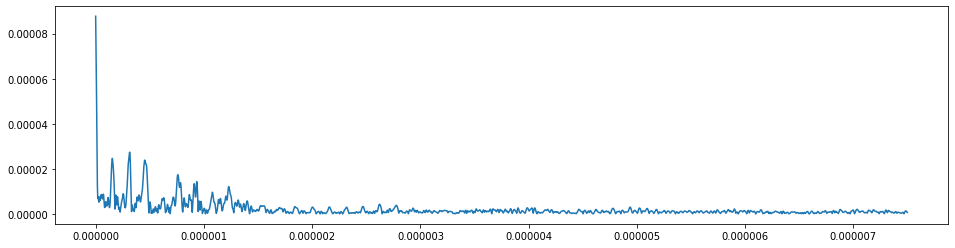

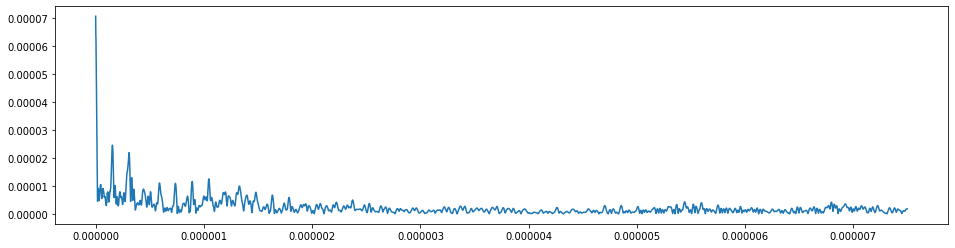

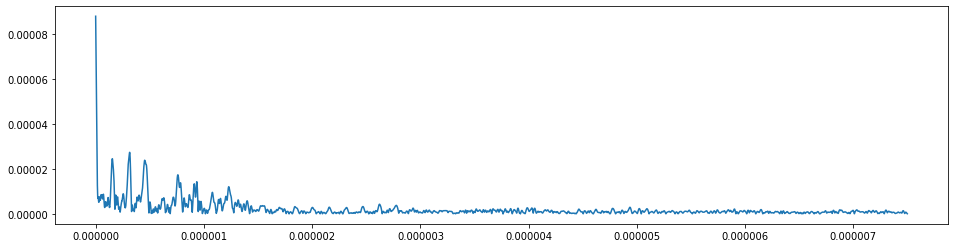

In [33]:
xf = np.linspace(0.0, 1.0/(2.0*amostras), fs)
plt.figure(figsize=(16, 4))
plt.plot(xf, 2/fs*np.abs(fft_arr[0][0:fs]))
#pd.Series(fft_arr[0]).plot()
plt.show()
plt.figure(figsize=(16, 4))
plt.plot(xf, 2/fs*np.abs(fft_arr[1][0:fs]))
plt.show()
plt.figure(figsize=(16, 4))
plt.plot(xf, 2/fs*np.abs(fft_arr[2][0:fs]))
plt.show()
plt.figure(figsize=(16, 4))
plt.plot(xf, 2/fs*np.abs(fft_arr[3][0:fs]))
plt.show()

In [34]:
fs*2

16000

In [35]:
print(np.linalg.norm(fft_arr[0] - fft_arr[1]))
print(np.linalg.norm(fft_arr[0] - fft_arr[2]))
print(np.linalg.norm(fft_arr[0] - fft_arr[3]))
print(np.linalg.norm(fft_arr[1] - fft_arr[2]))
print(np.linalg.norm(fft_arr[1] - fft_arr[3]))
print(np.linalg.norm(fft_arr[2] - fft_arr[3]))

2.634802623768006
2.3336969575455626
2.636054205771993
2.7301606506921963
2.6532054389888446
2.8428634737685723


In [36]:
print(np.linalg.norm(dct_arr[0] - dct_arr[1]))
print(np.linalg.norm(dct_arr[0] - dct_arr[2]))
print(np.linalg.norm(dct_arr[0] - dct_arr[3]))
print(np.linalg.norm(dct_arr[1] - dct_arr[2]))
print(np.linalg.norm(dct_arr[1] - dct_arr[3]))
print(np.linalg.norm(dct_arr[2] - dct_arr[3]))

3.7261736044540164
3.300345887530921
3.7279436075851096
3.861030218663432
3.75219911279424
4.020416080180332


In [37]:
from scipy.spatial import distance

In [38]:
print(distance.cosine(fft_arr[0].real, fft_arr[1].real))
print(distance.cosine(fft_arr[0].real, fft_arr[2].real))
print(distance.cosine(fft_arr[0].real, fft_arr[3].real))
print(distance.cosine(fft_arr[1].real, fft_arr[2].real))
print(distance.cosine(fft_arr[1].real, fft_arr[3].real))
print(distance.cosine(fft_arr[2].real, fft_arr[3].real))
print()
print(distance.cosine(dct_arr[0], dct_arr[1]))
print(distance.cosine(dct_arr[0], dct_arr[2]))
print(distance.cosine(dct_arr[0], dct_arr[3]))
print(distance.cosine(dct_arr[1], dct_arr[2]))
print(distance.cosine(dct_arr[1], dct_arr[3]))
print(distance.cosine(dct_arr[2], dct_arr[3]))

0.9673599854392126
0.9566599333250189
0.9725823229860527
0.7892201423213218
0.6461326930885529
0.8580192456364975

0.9765014326503838
0.9735675880512753
0.9796529490367387
0.7912332018075249
0.6471176504930695
0.8601813434894323
